# Run the whole deltas algorithm

In [48]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

Wisconsin Breast Cancer: 569
Number of attribues: 30
Classes total: 357 - 212

Classes train: 160 - 16
Classes test:  197 - 196


/home/matt/projects/linear_confidence/deltas/data/loaders/breast_cancer_W.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'][data['y']=='B'] = 0
/home/matt/projects/linear_confidence/deltas/data/loaders/breast_cancer_W.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'][data['y']=='M'] = 1


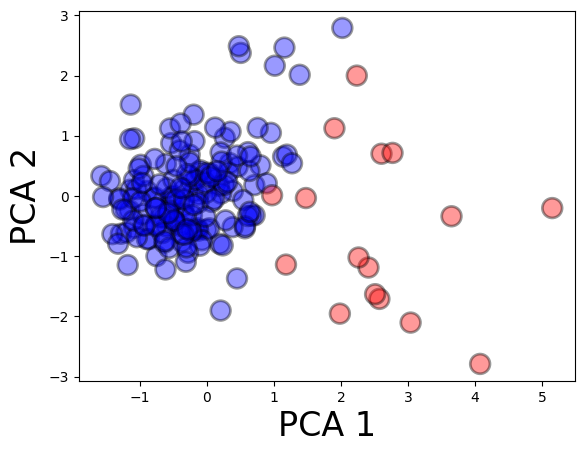

int64


In [49]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer',
            14: 'Wisconsin Breast Cancer'}
dataset = datasets[2]  # change ind to select dataset to use
model = 'MLP'

dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'MLP-deep'

dataset = datasets[14]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])
print(data_clf['data']['y'].dtype)

## Get Classifier

Tuning SVM params with 5 fold CV


Best SVM params: {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}
Baseline


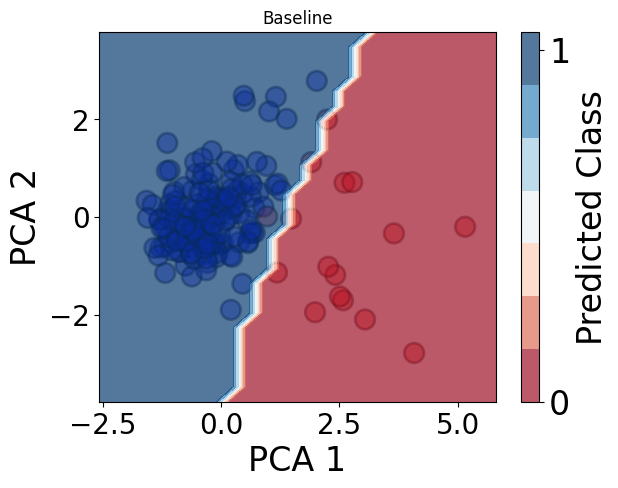

SMOTE


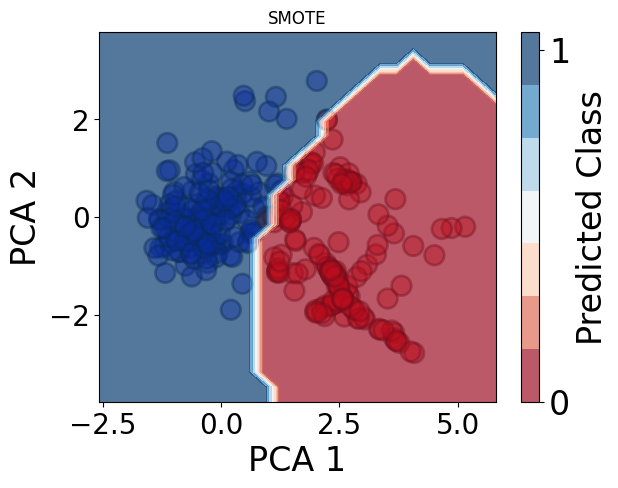

Balanced Weights


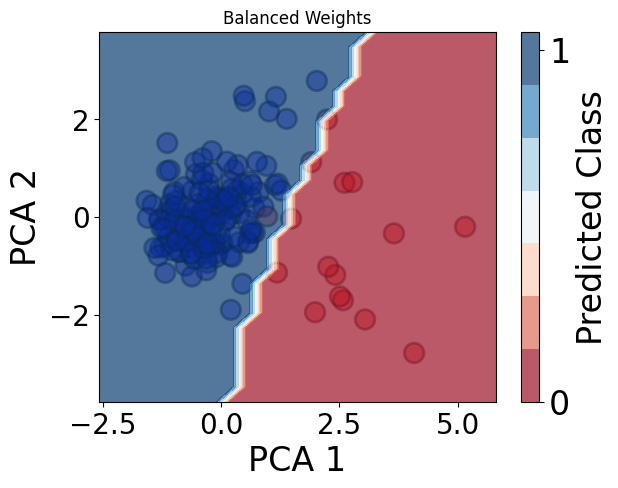

BMR


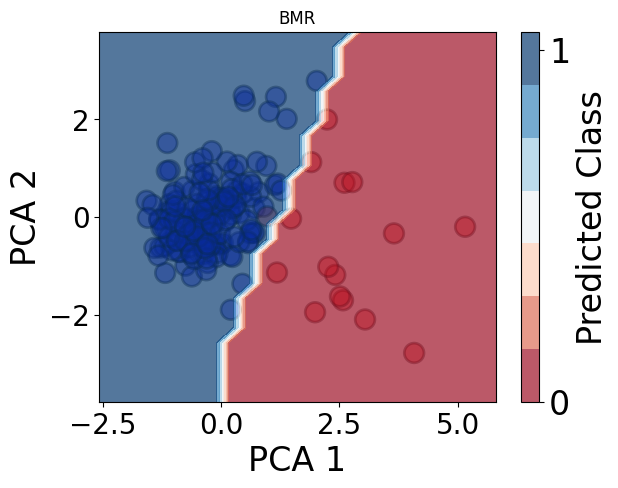

Threshold


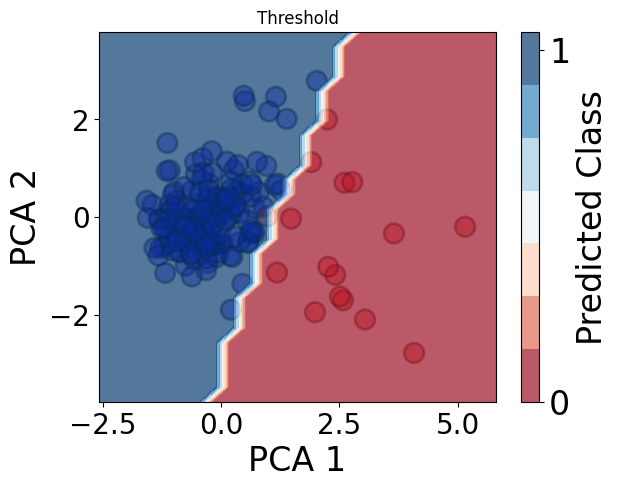

In [50]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data


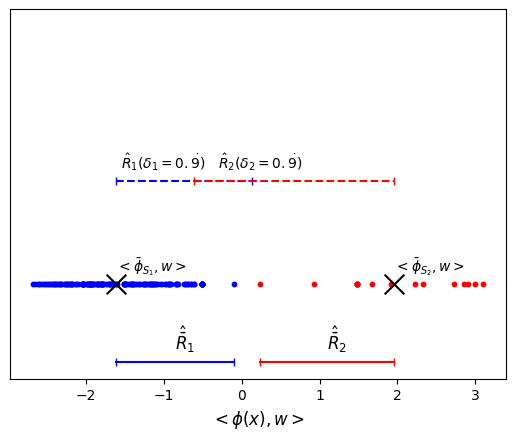

Budget 88 found 73 viable downsampled solutions
Best solution found by removing 2 data points
Downsampled Data:


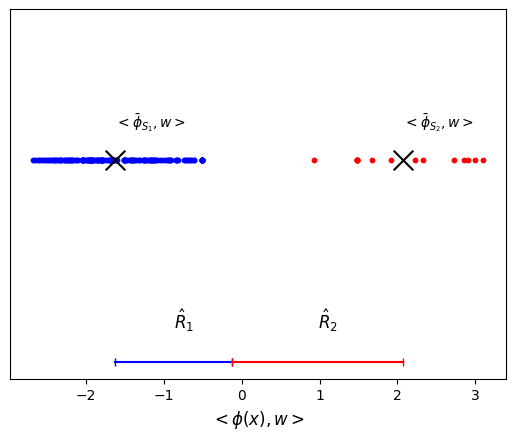

In [51]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

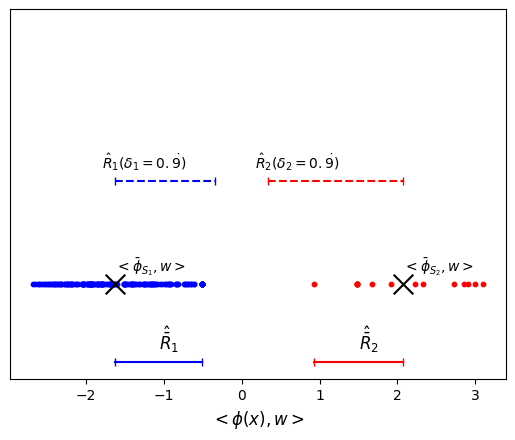

In [52]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [53]:
deltas_model.print_params()

Parameters
                R:  3.1052515751072374
                N1: 159
                N2: 15
                R1: 1.108838227814926
                R2: 1.1422110502304395
                M:  1.4433548157566438
                D:  3.6944040938020093
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Baseline          0.923664  0.920293  0.923469  0.917127
SMOTE             0.928753  0.926575  0.928597  0.923913
Balanced Weights  0.923664  0.920293  0.923469  0.917127
BMR               0.936387  0.934050  0.936224  0.931880
Threshold         0.944020  0.942208  0.943878  0.940541
Our Method        0.974555  0.974395  0.974516  0.974093 


Baseline


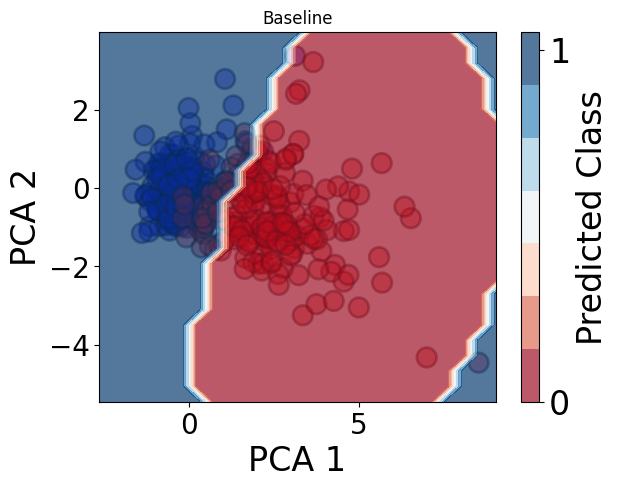

SMOTE


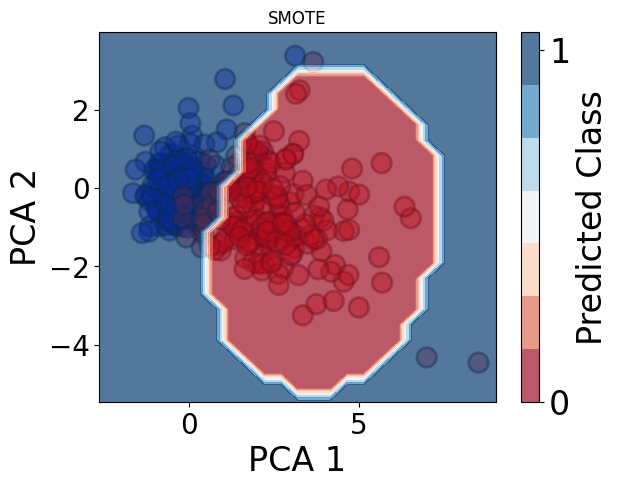

Balanced Weights


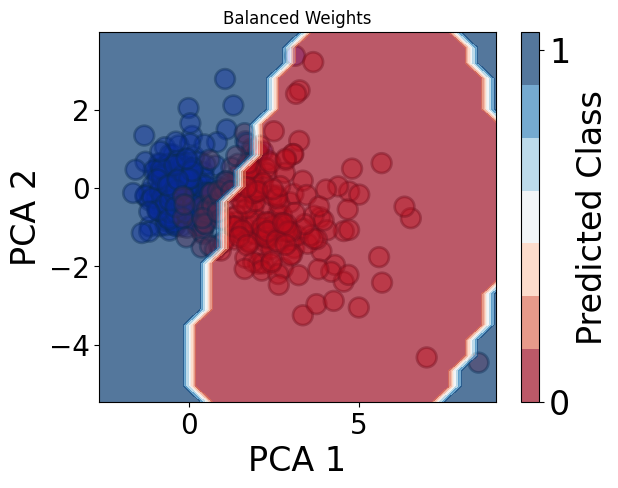

BMR


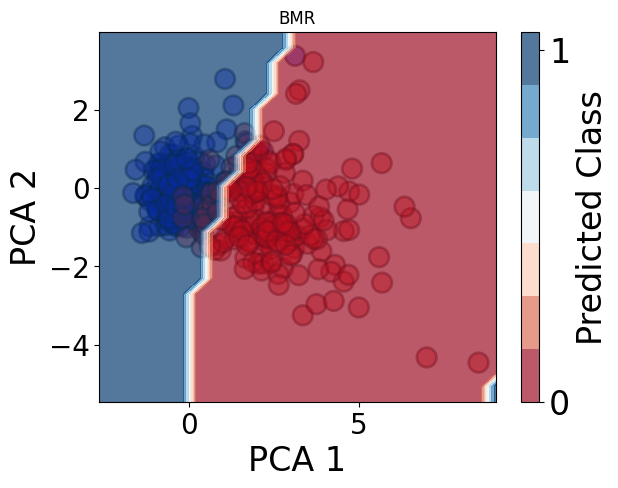

Threshold


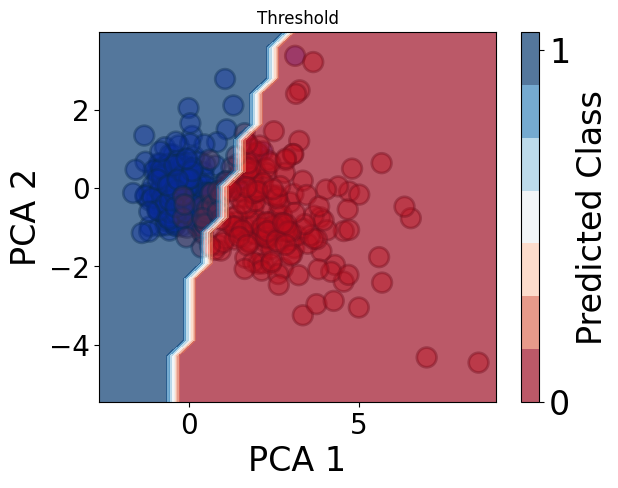

Our Method


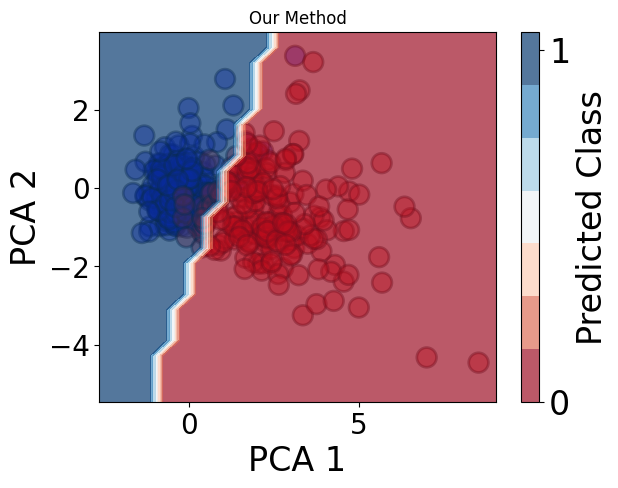

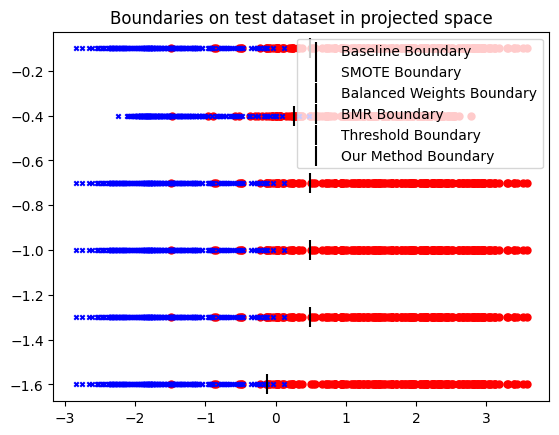

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.9237 & 0.9203 & 0.9235 & 0.9171 \\
SMOTE & 0.9288 & 0.9266 & 0.9286 & 0.9239 \\
Balanced Weights & 0.9237 & 0.9203 & 0.9235 & 0.9171 \\
BMR & 0.9364 & 0.9340 & 0.9362 & 0.9319 \\
Threshold & 0.9440 & 0.9422 & 0.9439 & 0.9405 \\
Our Method & 0.9746 & 0.9744 & 0.9745 & 0.9741 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.923664,0.920293,0.923469,0.917127
SMOTE,0.928753,0.926575,0.928597,0.923913
Balanced Weights,0.923664,0.920293,0.923469,0.917127
BMR,0.936387,0.934050,0.936224,0.931880
Threshold,0.944020,0.942208,0.943878,0.940541
Our Method,0.974555,0.974395,0.974516,0.974093


In [54]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])